In [1]:
# dataset link : https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
 
crime_data = pd.read_csv("C:\\Users\\user\\Downloads\\US_Crime_Rates_1960_2014.csv")

# Display the first few rows of the dataframe
crime_data.head()


,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


# Line chart 

In [17]:
import matplotlib.pyplot as plt

def plot_crime_trends(df):
    """
    Let's visualize some crime data! We'll make a groovy line chart to show how different
    crime types have changed over time. It'll be like a colorful history lesson.
    """

    # Time to break out the crayons! We'll make a rainbow of lines. 
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple']

    # Give our canvas some space so it's not a messy pile-up of lines
    plt.figure(figsize=(14, 7))

    # Now for the fun part - drawing a line for each crime  
    crime_types = ['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery', 
                   'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']
                   
    for i, crime in enumerate(crime_types):
       plt.plot(df['Year'], df[crime], marker='o', color=colors[i], label=crime)
       
    # Add some descriptive labels so folks know what's up  
    plt.title('Crime Trends in the US (1960-2010)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Crimes', fontsize=12)

    # A grid helps organize all the data into tidy little boxes
    plt.grid(True) 

    # And a legend is like a map key - it explains what each line means
    plt.legend()

    # The moment we've been waiting for...reveal the chart! 
    plt.show()

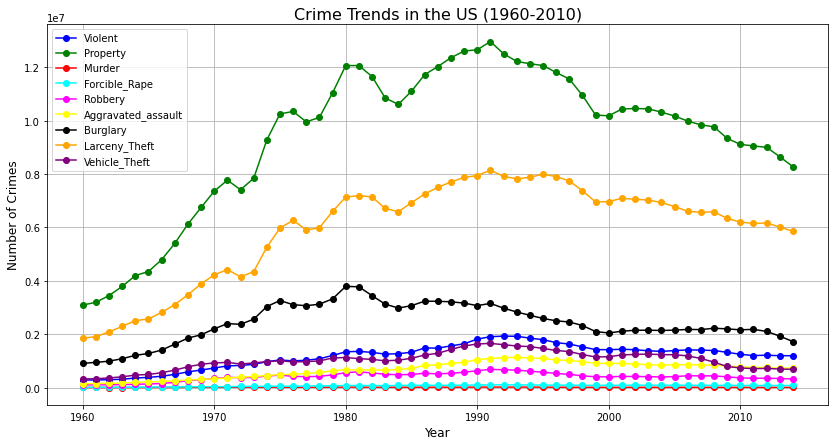

In [18]:
# Now let's call our function with the crime data.
plot_crime_trends(crime_data)

# bar graph

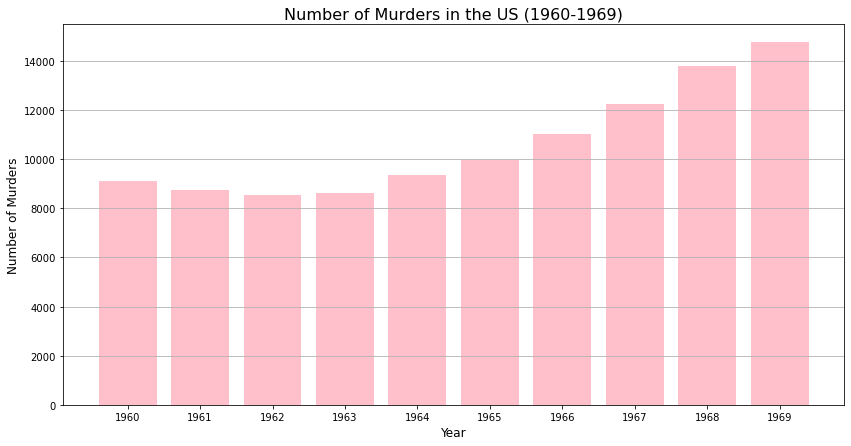

In [13]:
def plot_murders_first_decade(df):
    """
    Let's take a trip back in time to the groovy 1960s  
    and check out the murder rates in the US! 
    We'll make a rockin' bar chart to compare the numbers year-by-year.
    """
    
    # Grab just the first 10 rows 
    first_ten_years = df.head(10) 
    
    # Time to set up our canvas - make it big and bold!
    plt.figure(figsize=(14, 7))
    
    # Paint those bars pink to make a statement! 
    plt.bar(first_ten_years['Year'], first_ten_years['Murder'], color='pink')
    
    # Give our chart a far out title so everyone knows what's up
    plt.title('Number of Murders in the US (1960-1969)', fontsize=16) 
    
    # Label the axes so they're clear as day
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Murders', fontsize=12)

    # Add some gridlines for a fine-looking background
    plt.grid(axis='y') 
    
    # Align the years so this chart stays neat and tidy
    plt.xticks(first_ten_years['Year'])
    
    # And now, the moment we've been waiting for - cue the chart!
    plt.show()
    
plot_murders_first_decade(crime_data)

#  Pie chart

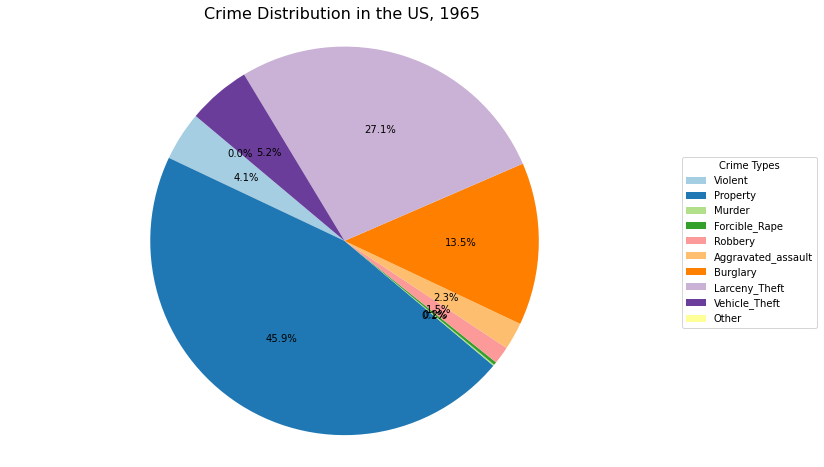

In [22]:
def plot_crime_pie_chart(df, year, threshold=1):
    """
    Pie chart to visualize the proportion of different crimes in a given year.
    Combines smaller slices into an 'Other' category and uses a legend instead of labels.
    """
  
    # Isolate the data for the chosen year  
    year_data = df[df['Year'] == year]

    # Keep just the crime stats, ditch the other columns  
    crime_stats = year_data.drop(columns=['Year', 'Total', 'Population']).iloc[0]

    # Group smaller categories into "Other"
    small_categories = crime_stats[crime_stats < threshold].sum()
    crime_stats = crime_stats[crime_stats >= threshold]
    crime_stats['Other'] = small_categories

    # Define a color palette
    colors = plt.cm.Paired(np.arange(len(crime_stats))/len(crime_stats))

    # Calculate the explode values for smaller slices to separate them a bit
    explode_values = [0.1 if value < threshold else 0 for value in crime_stats]

    # Crafting our pie chart  
    plt.figure(figsize=(12, 8)) 
    wedges, texts, autotexts = plt.pie(
        crime_stats, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        explode=explode_values
    )

    # We'll put the legend outside of the plot
    plt.legend(wedges, crime_stats.index, title="Crime Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Ensuring our pie looks as good as it tastes with an equal aspect ratio
    plt.axis('equal') 

    # Adding a clear title to our chart
    plt.title(f'Crime Distribution in the US, {year}', fontsize=16)

    # Show off the finished product!
    plt.show()
  
# Testing pie chart with the year 1965
plot_crime_pie_chart(crime_data, 1965)
